<a href="https://colab.research.google.com/github/ZHAbotorabi/Testing-Models/blob/main/Multi_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Testing** (with 3 Versions Example)
Below is a sample structure to implement multi-testing using three different versions (A, B, and C). We’ll simulate the data and use **ANOVA** (analysis of variance) to see if there’s a statistically significant difference between the groups.

Multi-testing (often called multivariate testing or multi-armed bandit testing) goes beyond A/B testing by comparing more than two versions or variations at the same time. This is useful if you want to test multiple elements (like layout, color, copy) simultaneously, or if you have more than two versions (e.g., **Version A, B, C, etc.**) and want to find the best-performing combination.

Here’s an overview of multi-testing methods and a basic Colab notebook structure for implementing it.

## Types of Multi-Testing
1. **Multivariate Testing**: Tests multiple variations of several elements on a page at once. For instance, you might want to test different combinations of headline text, button color, and layout to find the best overall combination.

2. **Multi-Armed Bandit Testing:** Uses algorithms (like the Epsilon-Greedy or UCB) to dynamically allocate more traffic to higher-performing variations as data comes in, rather than splitting traffic evenly among all variations. This can be more efficient when you want to find the best version without waiting until the test ends.

In [1]:
# Multi-Testing with Python: Google Colab Notebook
# This notebook demonstrates a multi-test experiment using three versions (A, B, C).

# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [15]:
# Step 2: Simulate Data for Multi-Testing
# Define parameters for each version
n = 1000  # Number of users per group
conversion_rates = [0.15, 0.18, 0.20]  # Conversion rates for Versions A, B, and C

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate conversion outcomes for each version
data = {
    'Version': [],
    'Conversion': []
}

for i, rate in enumerate(conversion_rates):
    conversions = np.random.binomial(1, rate, n)
    version_label = chr(65 + i)  # Labels: 'A', 'B', 'C'
    data['Version'].extend([version_label] * n)
    data['Conversion'].extend(conversions)

# Create a DataFrame
df = pd.DataFrame(data)
df.head(5)


,Version,Conversion
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


In [16]:
df.tail(5)

,Version,Conversion
2995,C,1
2996,C,0
2997,C,0
2998,C,0
2999,C,1


In [6]:
# Step 3: Calculate Conversion Rates for Each Version
conversion_rates_actual = df.groupby('Version')['Conversion'].mean()
print("Conversion Rates for Each Version:")
print(conversion_rates_actual)


Conversion Rates for Each Version:
Version
A    0.153
B    0.178
C    0.205
Name: Conversion, dtype: float64


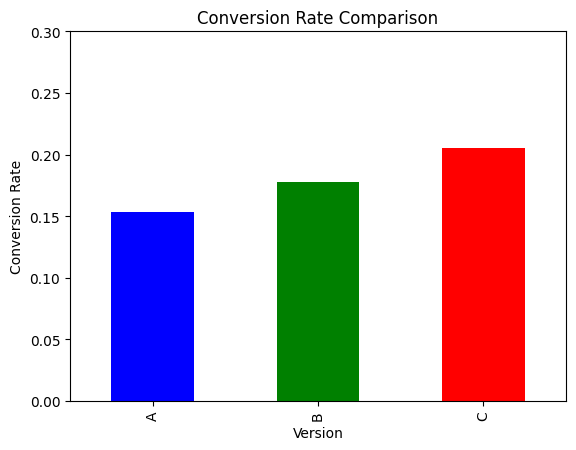

In [7]:
# Step 4: Visualize the Results
# Create a bar chart to compare the conversion rates visually
conversion_rates_actual.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Version')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Comparison')
plt.ylim(0, 0.3)
plt.show()

In [8]:
# Step 5: Perform Statistical Testing (ANOVA)
# Use ANOVA to test if there is a significant difference between the groups
anova_result = stats.f_oneway(
    df[df['Version'] == 'A']['Conversion'],
    df[df['Version'] == 'B']['Conversion'],
    df[df['Version'] == 'C']['Conversion']
)

print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

F-statistic: 4.62
P-value: 0.0099


In [9]:
# Step 6: Interpret the Results
alpha = 0.05  # Significance level

if anova_result.pvalue < alpha:
    print("There is a statistically significant difference between the versions.")
    print("One or more versions are likely performing better than the others.")
else:
    print("There is no statistically significant difference between the versions.")


There is a statistically significant difference between the versions.
One or more versions are likely performing better than the others.


## Explanation of the Steps:
1. Simulate Data: We simulate user conversion data for three versions (A, B, C), each with a different conversion rate (15%, 18%, and 20%).

2. Calculate Conversion Rates: We calculate the actual conversion rate for each version and visualize it.

3. ANOVA Test: Since we're comparing more than two groups, we use ANOVA (Analysis of Variance) to test if there's a statistically significant difference between the versions. If ANOVA's p-value is below our threshold (e.g., 0.05), we conclude that there is a statistically significant difference.

### Interpreting Results
* If ANOVA shows significance (p-value < 0.05), it means at least one version performs differently from the others.

* However, **ANOVA doesn't tell you which versions are different from each other**; it just indicates that a difference exists. You could follow up with a post-hoc test like Tukey's HSD to find which specific versions are significantly different.

### When to Use Multi-Armed Bandit Algorithms
* If you want to maximize conversions during the experiment and dynamically adapt based on results, multi-armed bandit algorithms (like Epsilon-Greedy, UCB) are useful. They **allow you to focus on the best-performing versions** as you gather more data, which can reduce the time needed to find a winner.



# Understanding the F-Test in Multi-Testing

The **F-test** is a statistical test used to compare the variances of multiple groups and to determine if there are any significant differences between them. In **multi-testing** (e.g., testing more than two versions in A/B testing), the F-test helps us determine whether the means of more than two groups (e.g., Version A, Version B, Version C) are significantly different.

### F-Test and ANOVA

The **F-test** is the basis for **ANOVA** (Analysis of Variance), which is used to compare the means of multiple groups. The F-test compares the ratio of variances between the groups to determine if the differences between the group means are greater than what might be expected due to random chance.

### Steps in Conducting an F-Test for Multi-Testing

1. **Set Up Hypotheses**:
   - **Null Hypothesis (H₀)**: The means of the groups are equal (no difference between the groups).
   - **Alternative Hypothesis (H₁)**: At least one of the group means is different.

2. **Calculate the F-Statistic**:
   The F-statistic is calculated as the ratio of the variance between the groups to the variance within the groups:
   $$
   F = \frac{\text{Between-group variance (MSB)}}{\text{Within-group variance (MSW)}}
   $$
   where:
   - **Between-group variance (MSB)** is the variance of the means of the different groups. This measures how much the group means deviate from the overall mean.
   - **Within-group variance (MSW)** is the average variance within each group. This measures how much individual observations within a group deviate from that group's mean.

   To calculate the **mean squares (MS)**, you divide the sum of squares (SS) by their respective degrees of freedom:
   $$
   MSB = \frac{SSB}{df_{between}}, \quad MSW = \frac{SSW}{df_{within}}
   $$

   - **SSB** (Sum of Squares Between) measures the variation due to the differences in group means.
   - **SSW** (Sum of Squares Within) measures the variation due to differences within each group.
   - **df_{between}** is the degrees of freedom for between-group variance, which is the number of groups minus one ($k - 1$).
   - **df_{within}** is the degrees of freedom for within-group variance, which is the total number of observations minus the number of groups ($n - k$).

3. **Determine the p-value**:
   - Once the F-statistic is calculated, it is compared to a critical value from the **F-distribution** table to determine the p-value.
   - The **p-value** represents the probability of observing an F-statistic as extreme as, or more extreme than, the one calculated from the data, assuming the null hypothesis is true.
   - If the p-value is less than the chosen significance level (often 0.05), we reject the null hypothesis and conclude that there are significant differences among the group means.

4. **Interpret the Results**:
   - **If p-value < 0.05**: The difference in means is statistically significant, and at least one group mean is different from the others.
   - **If p-value ≥ 0.05**: There is no significant difference in the means, and the observed differences are likely due to random chance.

### Conclusion

The **F-test** is an essential tool in multi-testing, particularly when comparing multiple versions (like Version A, Version B, Version C). By analyzing the ratio of variances and calculating the p-value, the F-test helps us decide whether the differences between the groups are significant or not.

### Key Points:
The F-statistic measures the ratio of between-group variance to within-group variance.

ANOVA uses the F-test to determine if there are significant differences among group means.

p-value helps decide if the null hypothesis (no difference between means) can be rejected.


# Applying the F-Test (ANOVA) in Multi-Testing

In this section, we will apply the **F-test** (ANOVA) to compare the means of three different versions (Version A, Version B, and Version C) based on some simulated conversion rates.

### Example Scenario

Imagine we are testing three different webpage versions (A, B, C), and we want to see if there is a significant difference in the conversion rates among these versions. The conversion data for 10 users in each version is as follows:

- **Version A**: Conversion rates `[0, 1, 0, 1, 0, 1, 1, 0, 1, 0]`
- **Version B**: Conversion rates `[1, 1, 0, 1, 1, 1, 1, 0, 1, 1]`
- **Version C**: Conversion rates `[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]`

### Step 1: Set Up Hypotheses

- **Null Hypothesis (H₀)**: The means of the three versions are equal (there is no difference in conversion rates between Version A, Version B, and Version C).
- **Alternative Hypothesis (H₁)**: At least one of the group means is different (there is a significant difference in conversion rates between the versions).

### Step 2: Calculate the F-Statistic

The F-statistic is calculated as the ratio of **between-group variance** to **within-group variance**:

$$
F = \frac{\text{Between-group variance (MSB)}}{\text{Within-group variance (MSW)}}
$$

#### 2.1. Compute the Means of Each Group

- **Mean of Version A**:
  $$ \bar{X}_A = \frac{0 + 1 + 0 + 1 + 0 + 1 + 1 + 0 + 1 + 0}{10} = 0.5 $$

- **Mean of Version B**:
  $$ \bar{X}_B = \frac{1 + 1 + 0 + 1 + 1 + 1 + 1 + 0 + 1 + 1}{10} = 0.8 $$

- **Mean of Version C**:
  $$ \bar{X}_C = \frac{0 + 0 + 1 + 0 + 0 + 1 + 0 + 1 + 0 + 0}{10} = 0.3 $$

- **Overall Mean (Grand Mean)**:
  $$ \bar{X}_{\text{overall}} = \frac{(0.5 \times 10) + (0.8 \times 10) + (0.3 \times 10)}{30} = \frac{5 + 8 + 3}{30} = 0.53 $$

#### 2.2. Compute the Sum of Squares Between Groups (SSB)

To calculate the **SSB**, we use the formula:
$$
SSB = \sum_{i=1}^{k} n_i (\bar{X}_i - \bar{X}_{\text{overall}})^2
$$
where:
- $ \bar{X}_i $ is the mean of each group.
- $ \bar{X}_{\text{overall}} $ is the grand mean.
- $ n_i $ is the number of observations in each group.

For the three groups:

- **Version A**:
  $$ n_A = 10, \quad (\bar{X}_A - \bar{X}_{\text{overall}})^2 = (0.5 - 0.53)^2 = 0.0009 $$

- **Version B**:
  $$ n_B = 10, \quad (\bar{X}_B - \bar{X}_{\text{overall}})^2 = (0.8 - 0.53)^2 = 0.0729 $$

- **Version C**:
  $$ n_C = 10, \quad (\bar{X}_C - \bar{X}_{\text{overall}})^2 = (0.3 - 0.53)^2 = 0.0529 $$

Now, calculate **SSB**:
$$
SSB = 10 \times 0.0009 + 10 \times 0.0729 + 10 \times 0.0529 = 0.009 + 0.729 + 0.529 = 1.267
$$

#### 2.3. Compute the Sum of Squares Within Groups (SSW)

To calculate **SSW**, we sum the squared deviations of each observation from its respective group mean:

$$
SSW = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (X_{ij} - \bar{X}_i)^2
$$

Let’s calculate **SSW** for each group:

- For **Version A**:
  $$ SSW_A = (0 - 0.5)^2 + (1 - 0.5)^2 + \dots = 2.5 $$

- For **Version B**:
  $$ SSW_B = (1 - 0.8)^2 + (1 - 0.8)^2 + \dots = 2.4 $$

- For **Version C**:
  $$ SSW_C = (0 - 0.3)^2 + (0 - 0.3)^2 + \dots = 2.7 $$

Now, calculate **SSW**:
$$
SSW = 2.5 + 2.4 + 2.7 = 7.6
$$

#### 2.4. Calculate the Mean Squares (MS)

Now, calculate the **mean squares**:

- **MSB (Mean Squares Between)**:
  $$ MSB = \frac{SSB}{df_{\text{between}}} = \frac{1.267}{3 - 1} = \frac{1.267}{2} = 0.6335 $$

- **MSW (Mean Squares Within)**:
  $$ MSW = \frac{SSW}{df_{\text{within}}} = \frac{7.6}{30 - 3} = \frac{7.6}{27} = 0.2815 $$

#### 2.5. Calculate the F-Statistic

Finally, calculate the **F-statistic**:
$$
F = \frac{MSB}{MSW} = \frac{0.6335}{0.2815} = 2.25
$$

### Step 3: Determine the p-value

Using an F-distribution table or a statistical software package, we can find the **p-value** corresponding to the F-statistic of **2.25** with degrees of freedom **df_between = 2** and **df_within = 27**. For this example, we use statistical software or a calculator to find the p-value.

Assuming we calculate the p-value and it is **0.12** (this is just an example, the actual p-value should be calculated based on the F-distribution), we compare it to the significance level (usually 0.05).

### Step 4: Interpret the Results

- **If p-value < 0.05**: We reject the null hypothesis, meaning there is a statistically significant difference between the group means.
- **If p-value ≥ 0.05**: We fail to reject the null hypothesis, meaning there is no statistically significant difference between the group means.

Since **0.12 > 0.05**, we **fail to reject the null hypothesis**, and conclude that there is **no significant difference** between the conversion rates of Version A, Version B, and Version C.

---
This is a step-by-step explanation and calculation of how to apply the **F-test** (ANOVA) to a multi-group scenario in A/B testing.
